In [1]:
import py21cmcast as p21c
import numpy as np 

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
z_bins, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 22, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

fiducial = p21c.Fiducial("../runs/CONSTRAINT_BKR", z_bins, k_bins, False, load=True)
 
fiducial.observation = 'HERA'

The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


In [3]:
parameter_names = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC',  'M_TURN', 't_STAR', 'L_X', 'NU_X_THRESH']
#parameter_names = ['F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI',  't_STAR', 
#                   'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH']

params = [None] * len(parameter_names)

for iname, name in enumerate(parameter_names) :  
    params[iname] = p21c.Parameter(fiducial=fiducial, name=name, verbose = False, plot = False, load=True)

Treating parameter F_STAR10
Treating parameter ALPHA_STAR
Treating parameter F_ESC10
Treating parameter ALPHA_ESC
Treating parameter M_TURN
Treating parameter t_STAR
Treating parameter L_X
Treating parameter NU_X_THRESH


In [5]:
val_gamma  = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26]
extra_params = [None] * len(val_gamma)

for iname, val in enumerate(val_gamma) :  
    extra_params[iname] = p21c.Parameter(fiducial=fiducial, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm8.0', values = val)

Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
No existing data found for Lightcone_rs1993_DM_DECAY_RATE_m8.0_1.0000e-33.h5
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)


In [6]:
fiducial.frac_noise = 0.2

sigma_tau = np.zeros(len(val_gamma))

for iname, val in enumerate(val_gamma) : 
    fisher_matrix     = p21c.evaluate_fisher_matrix([*params, extra_params[iname]])
    covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
    sigma_tau[iname] = 1/(2.*np.sqrt(covariance_matrix[-1][-1]))

print('----------')
print(sigma_tau)

----------
[1.78163796e+29 4.51414670e+28 3.10451115e+28 3.35273752e+28
 3.44857647e+28 3.27657908e+28 3.27866633e+28 3.06011727e+28
 2.10264626e+28 1.10471464e+28 1.77055058e+27]


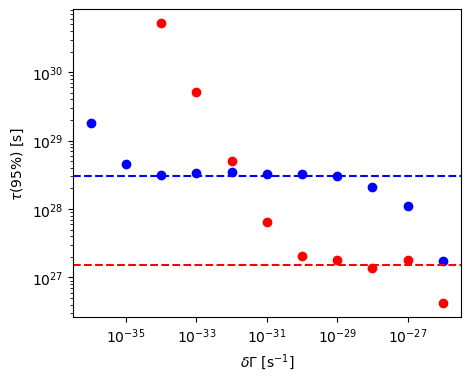

In [16]:
%matplotlib inline

sigma_tau_MINIHALOS = [ 5.19683881e+30, 5.16799457e+29, 5.07681694e+28,
 6.43874756e+27, 2.04968051e+27, 1.82196820e+27, 1.37220418e+27,
 1.82142164e+27, 4.20497971e+26]
val_gamma_MINIHALOS = [ 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26]

fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\tau(95\%) ~ [{\rm s}]$')
ax.plot(val_gamma, sigma_tau, marker='o', linestyle = 'none', color='b')
ax.plot(val_gamma_MINIHALOS, sigma_tau_MINIHALOS, marker='o', linestyle = 'none', color='r')
#ax.plot(val_gamma, 0.1/(2*np.array(val_gamma)), 'k-')
ax.axhline(y=3e+28, color='b', linestyle='--')
ax.axhline(y=1.5e+27, color='r', linestyle='--')

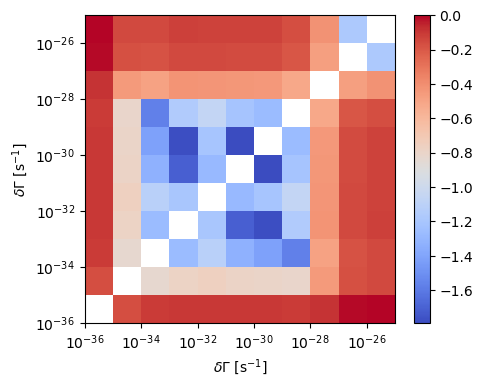

In [13]:
fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$')

def L2_norm(array_1, array_2):
    return np.sqrt(np.sum((array_1 - array_2)**2))

dist_matrix = np.zeros(shape=(len(val_gamma), len(val_gamma)))

for i, ival in enumerate(val_gamma) :  
    for j, jval in enumerate(val_gamma) :
        dist_matrix[i][j] = L2_norm(extra_params[i].weighted_ps_derivative(), extra_params[j].weighted_ps_derivative()) 

    dist_matrix[i][i] = np.nan


c = ax.pcolormesh([*val_gamma, 1e-25], [*val_gamma, 1e-25],  np.log10(dist_matrix/np.nanmax(dist_matrix)), cmap='coolwarm')
fig.colorbar(c, ax = ax)